# Vertex embeddings of weak signal vertices

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from graspologic.embed import OmnibusEmbed
from graspologic.datasets import load_mice

from pairplot import ellipse_pairgrid

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)

# Sort the connectomes and genotypic labels so BTBR is first
label_indices = np.argsort(mice.labels).reshape(4, 8)
label_indices = label_indices[[1, 0, 2, 3]].reshape(-1)

labels = mice.labels[label_indices]
graphs = graphs[label_indices]

<IPython.core.display.Javascript object>

In [4]:
# Jointly embed graphs using omnibus embedding
embedder = OmnibusEmbed()
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 5)


<IPython.core.display.Javascript object>

In [5]:
# Get the rankings of the vertices
def lookup_roi_name(roi):
    roi -= 1
    hemisphere = "R" if roi // 166 else "L"
    roi = roi % 166
    structure = mice.atlas["Structure"].values[roi]
    return f"{structure} ({hemisphere})"


signal_vertices = pd.read_csv("../../results/signal_vertices.csv")
signal_vertices["roi_name"] = signal_vertices["ROI"].apply(lookup_roi_name)

<IPython.core.display.Javascript object>

In [6]:
def plot_vertex_embedding(rank):
    """Plot the omnibus embedding of a specific ROI for all strains."""

    # Get index for the input structure
    print(signal_vertices.iloc[rank]["significant"])
    structure, hemisphere = signal_vertices.iloc[rank]["roi_name"].split(" ")
    index = mice.atlas.query(f"Structure == '{structure}'")["ROI"].values[0]
    index = index + 166 if hemisphere == "(R)" else index
    index -= 1

    # Make the plot
    g = ellipse_pairgrid(omni_embedding[:, index, :3], labels, ci=0.9)
    structure = " ".join(structure.split("_"))
    g.fig.suptitle(f"{structure} {hemisphere}", y=1.025)
    g.fig.set(dpi=300)
    g.add_legend()
    plt.show()

<IPython.core.display.Javascript object>

True


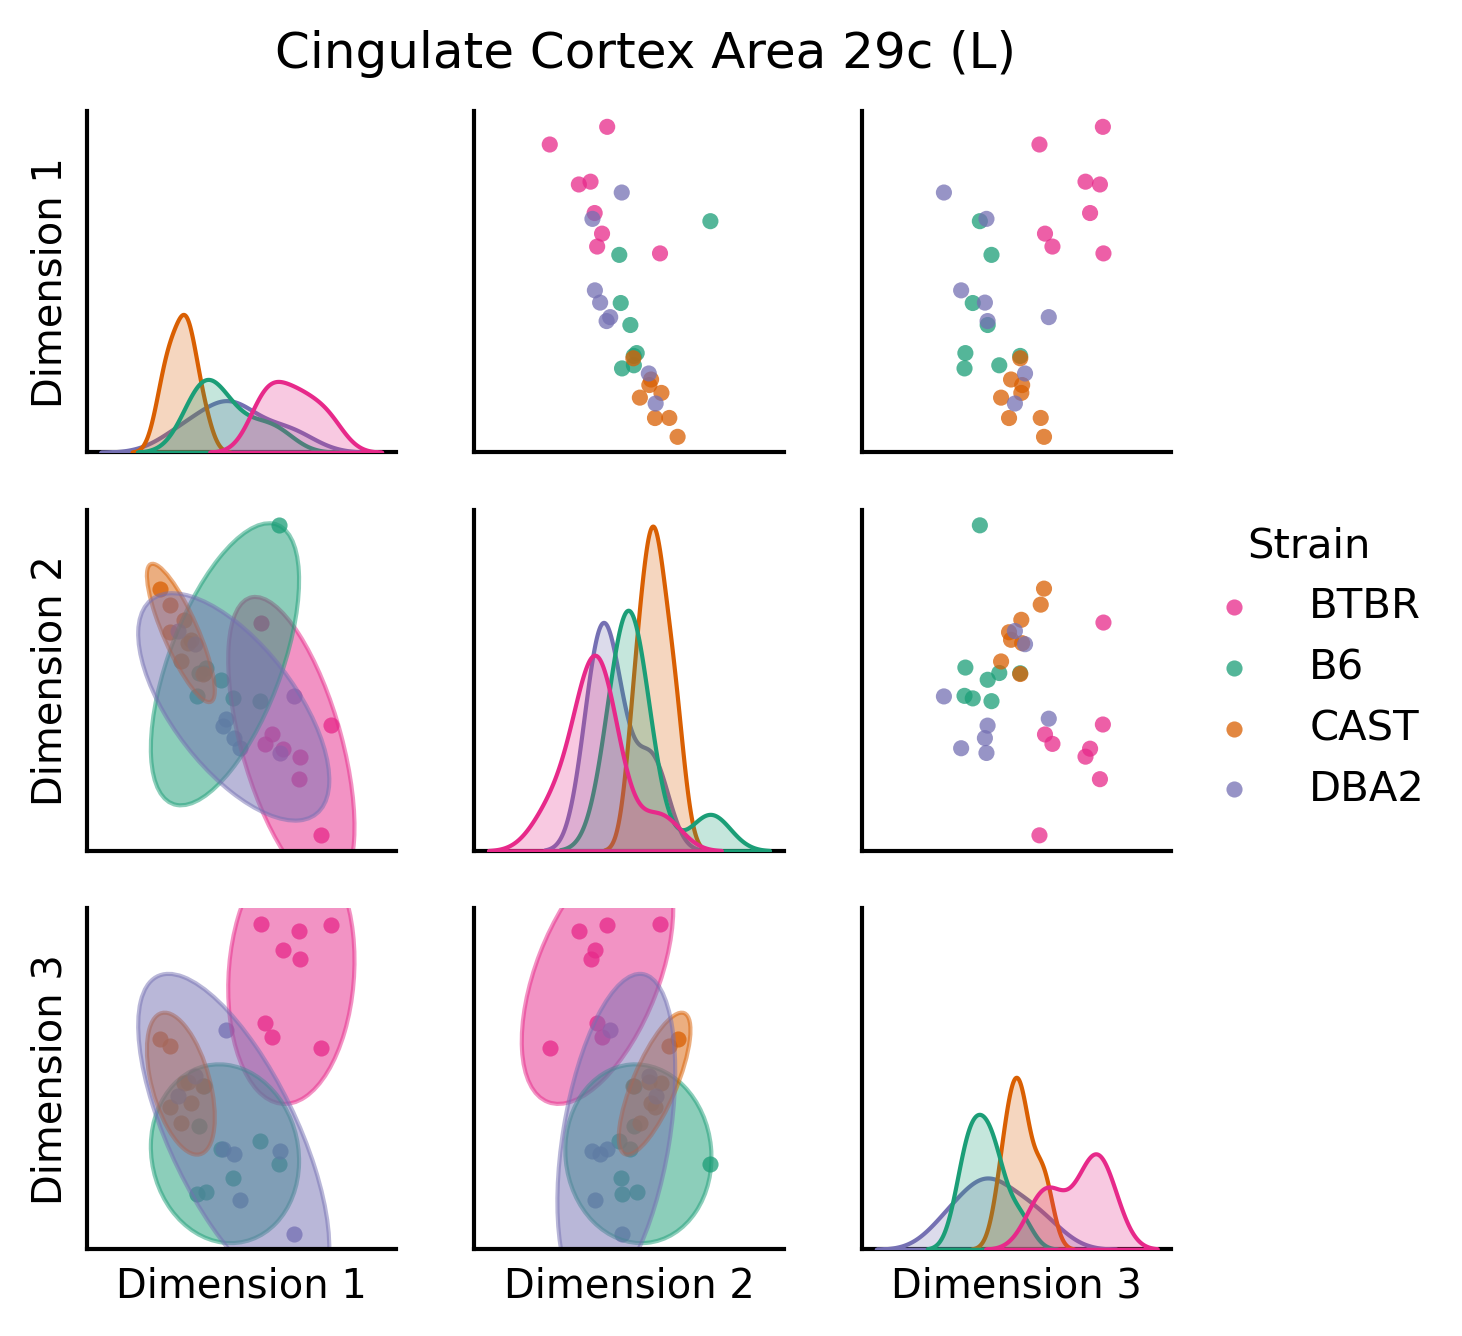

<IPython.core.display.Javascript object>

In [7]:
plot_vertex_embedding(173)

True


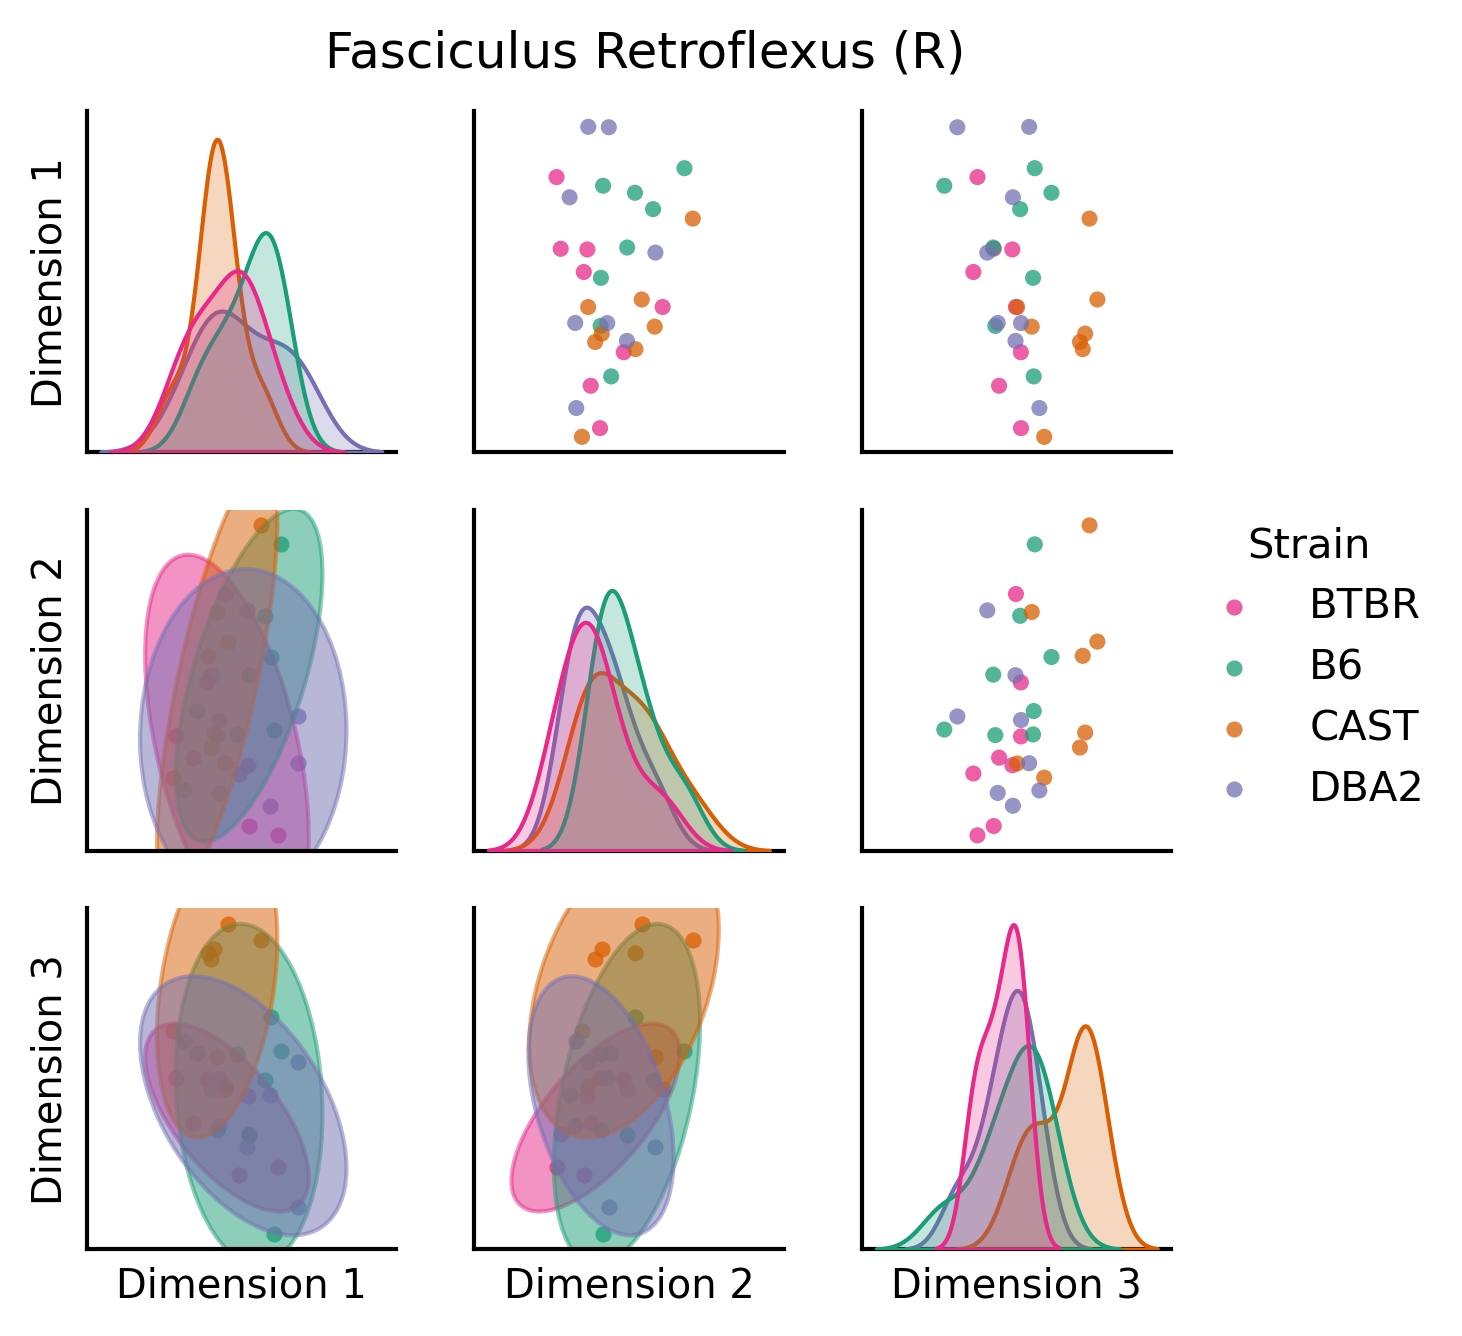

<IPython.core.display.Javascript object>

In [8]:
plot_vertex_embedding(260)